In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [2]:
data = pd.read_csv('train.csv')

In [3]:
test_data1 = pd.read_csv('test.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data = data.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

In [6]:
data['TicketPrefix'] = data['Ticket'].str.extract('([A-Za-z\.]+)', expand=False)

In [7]:
prefix_mapping = {prefix: i for i, prefix in enumerate(data['TicketPrefix'].unique())}

In [8]:
data['TicketPrefix'] = data['TicketPrefix'].map(prefix_mapping)

In [9]:
data = data.drop('Ticket', axis=1)

In [10]:
fare = pd.DataFrame(data['Fare'])

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
newfare = min_max_scaler.fit_transform(fare)
print(newfare)
data['Fare_1'] = newfare

[[0.01415106]
 [0.13913574]
 [0.01546857]
 [0.1036443 ]
 [0.01571255]
 [0.0165095 ]
 [0.10122886]
 [0.04113566]
 [0.02173075]
 [0.05869429]
 [0.03259623]
 [0.05182215]
 [0.01571255]
 [0.06104473]
 [0.01533038]
 [0.03122992]
 [0.05684821]
 [0.02537431]
 [0.03513366]
 [0.01410226]
 [0.05074862]
 [0.02537431]
 [0.01567195]
 [0.06929139]
 [0.04113566]
 [0.06126432]
 [0.01410226]
 [0.51334181]
 [0.01537917]
 [0.01541158]
 [0.0541074 ]
 [0.28598956]
 [0.01512699]
 [0.02049464]
 [0.16038672]
 [0.10149724]
 [0.01411046]
 [0.01571255]
 [0.03513366]
 [0.02194234]
 [0.01849397]
 [0.04098927]
 [0.01541158]
 [0.08115719]
 [0.01537917]
 [0.01571255]
 [0.03025399]
 [0.01512699]
 [0.04231498]
 [0.03474329]
 [0.07746484]
 [0.01522459]
 [0.14976542]
 [0.05074862]
 [0.12097534]
 [0.06929139]
 [0.02049464]
 [0.01411046]
 [0.05416439]
 [0.0915427 ]
 [0.01411046]
 [0.1561496 ]
 [0.16293235]
 [0.05445717]
 [0.0541074 ]
 [0.02975782]
 [0.02049464]
 [0.01592394]
 [0.01546857]
 [0.01690807]
 [0.02049464]
 [0.09

In [12]:
print(data.isnull().sum())

Survived          0
Pclass            0
Sex               0
Age             177
SibSp             0
Parch             0
Fare              0
Embarked          2
TicketPrefix      0
Fare_1            0
dtype: int64


In [13]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Age'] = data['Age'].astype(int)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
print(data.isnull().sum())

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
TicketPrefix    0
Fare_1          0
dtype: int64


In [14]:
data['Age'] = data['Age'].astype(int)

In [15]:
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [16]:
X = data.drop(['Survived',"Fare"], axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8435754189944135


[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]


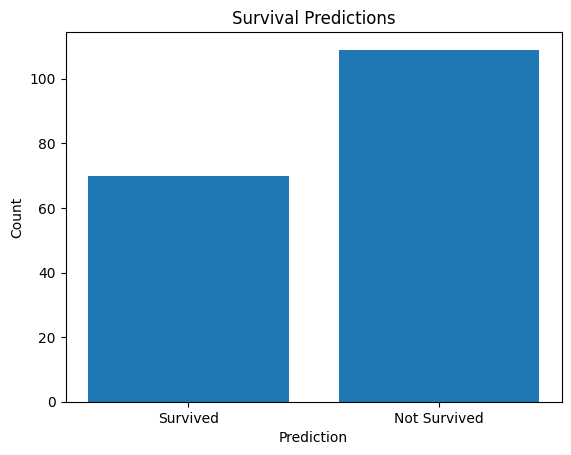

In [18]:
print(y_pred)
import matplotlib.pyplot as plt

survived_count = sum(y_pred)
not_survived_count = len(y_pred) - survived_count

plt.bar(['Survived', 'Not Survived'], [survived_count, not_survived_count])
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Survival Predictions')

plt.show()